In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm
import numpy as np
import pandas as pd
from nltk.probability import FreqDist

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize


In [19]:
def title_time(df):
    """Input: dataframe
    Output: start time and end time of earthquake"""
    title = '%s through %s' % (str(df['time'][df['index']==min(df['index'])]).split()[1],str(df['time'][df['index']==max(df['index'])]).split()[1])
    return title

def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 2.0:
        return ('go')
    elif magnitude < 4.0:
        return ('yo')
    else:
        return ('ro')

def get_stat(statename):
    """Inpute: state name, ex: 'California'
    Output: earthquake information of that state"""
    ca = pd.DataFrame()
    for i in range(len(us)):
        if us['state'][i] == statename:
            ca = ca.append(us.loc[i])
    return ca

def map_mag(df,lllon,lllat,urlon,urlat):
    my_map = Basemap(projection='merc', lat_0=57, lon_0=-135,
                     resolution = 'h', area_thresh = 1000.0,
                     llcrnrlon=lllon, llcrnrlat=lllat,
                     urcrnrlon=urlon, urcrnrlat=urlat)

    my_map.drawcoastlines()
    my_map.drawcountries()
    my_map.fillcontinents(color='coral')
    my_map.drawmapboundary()
    my_map.drawstates()

    lats = df['latitude']
    lons = df['longitude']
    magnitudes = df['mag']
    min_marker_size = 2.0
    for lon, lat, mag in zip(lons, lats, magnitudes):
        x,y = my_map(lon, lat)
        msize = mag * min_marker_size
        marker_string = get_marker_color(mag)
        my_map.plot(x, y, marker_string, markersize=msize)
    title = 'Earthquakes of Magnitude 1.0 or Greater\n'
    title += title_time(df)
    plt.title(title)
    plt.show()

def map_mag_earth(df,lllon,lllat,urlon,urlat):
    my_map = Basemap(projection='merc', lat_0=57, lon_0=-135,
                     resolution = 'h', area_thresh = 1000.0,
                     llcrnrlon=lllon, llcrnrlat=lllat,
                     urcrnrlon=urlon, urcrnrlat=urlat)
    
    my_map.drawcoastlines()
    my_map.drawcountries()
    my_map.drawmapboundary()
    my_map.drawstates()
    my_map.bluemarble()

    lats = df['latitude']
    lons = df['longitude']
    magnitudes = df['mag']
    min_marker_size = 1
    for lon, lat, mag in zip(lons, lats, magnitudes):
        x,y = my_map(lon, lat)
        msize = mag * min_marker_size
        marker_string = get_marker_color(mag)
        my_map.plot(x, y, marker_string, markersize=msize)
    title = 'Earthquakes of Magnitude 1.0 or Greater\n'
    title += title_time(df)
    plt.title(title)
    plt.show()    


In [3]:
us = pd.read_csv('us_earthquake.csv')
us.head()

,index,depth,depthError,dmin,gap,horizontalError,id,latitude,locationSource,longitude,...,magType,net,nst,place,rms,state,status,time,type,updated
0,0,8.1,0.4,NaN,NaN,NaN,ak15281000,63.8717,ak,-150.3950,...,ml,ak,NaN,"70km W of Healy, Alaska",0.73,Alaska,automatic,2017-02-16T19:41:22.795Z,earthquake,2017-02-16T19:50:28.148Z
1,7,68.9,1.8,NaN,NaN,NaN,ak15279992,62.6021,ak,-149.8518,...,ml,ak,NaN,"33km NNE of Talkeetna, Alaska",0.99,Alaska,automatic,2017-02-16T17:11:22.122Z,earthquake,2017-02-16T17:18:16.728Z
2,14,83.8,0.7,NaN,NaN,NaN,ak15279988,61.4375,ak,-151.6854,...,ml,ak,NaN,"85km NNW of Nikiski, Alaska",0.43,Alaska,automatic,2017-02-16T16:28:06.568Z,earthquake,2017-02-16T16:37:51.297Z
3,19,30.5,0.2,NaN,NaN,NaN,ak15279524,61.7097,ak,-149.6386,...,ml,ak,NaN,"9km NNW of Meadow Lakes, Alaska",0.52,Alaska,automatic,2017-02-16T15:27:17.594Z,earthquake,2017-02-16T15:36:51.257Z
4,20,16.5,0.4,NaN,NaN,NaN,ak15279522,59.9683,ak,-147.0029,...,ml,ak,NaN,"70km NNW of Middleton Island, Alaska",0.77,Alaska,automatic,2017-02-16T15:23:09.053Z,earthquake,2017-02-16T15:31:38.912Z


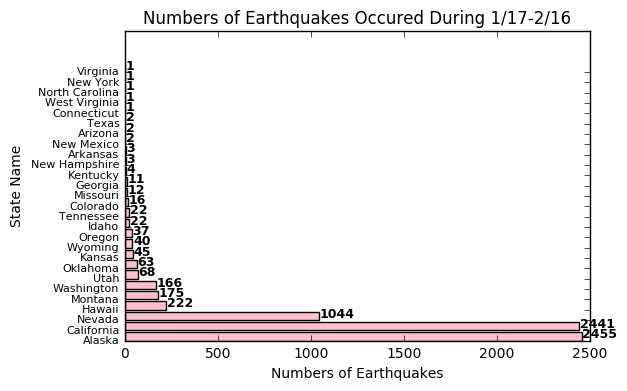

In [4]:
c = us['state'].value_counts()
y = c.values
x = c.index
l = np.arange(len(c))

fig,ax = plt.subplots()
plt.barh(l, y, color = 'pink')
plt.yticks(l, x, size = 8)
plt.xlabel('Numbers of Earthquakes')
plt.ylabel('State Name')
plt.title('Numbers of Earthquakes Occured During 1/17-2/16')
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='black',size = 9,fontweight='bold')

plt.show()

From Jan. 17 - Feb. 16, earthquake occured the most in California, Alaska, and Nevada.

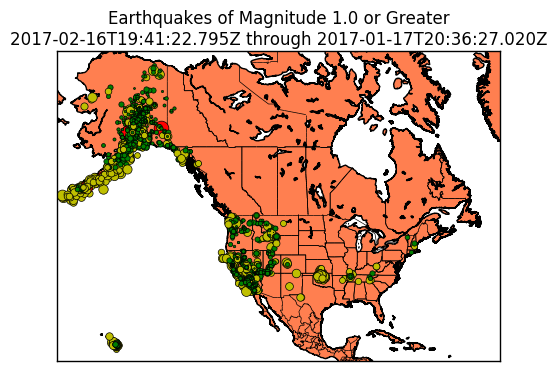

In [20]:
"""USA territories"""
map_mag(us, -172, 15, -47.25, 71)

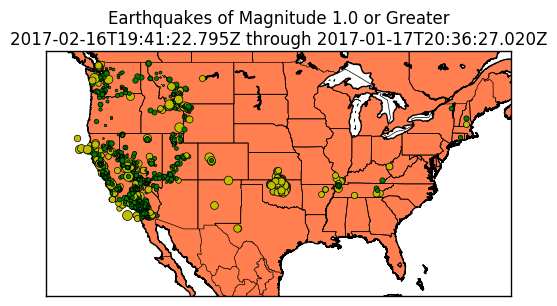

In [21]:
"""USA mainland"""
map_mag(us, -130.25, 23, -65.25, 50)

In [7]:
ak = get_stat('Alaska')
ca = get_stat('California')

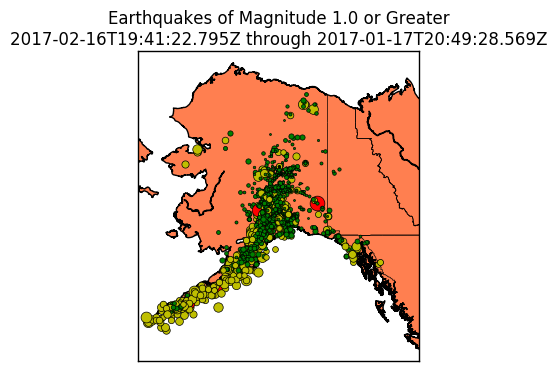

In [22]:
"""Alaska"""
map_mag(ak, -172, 48, -126, 72)

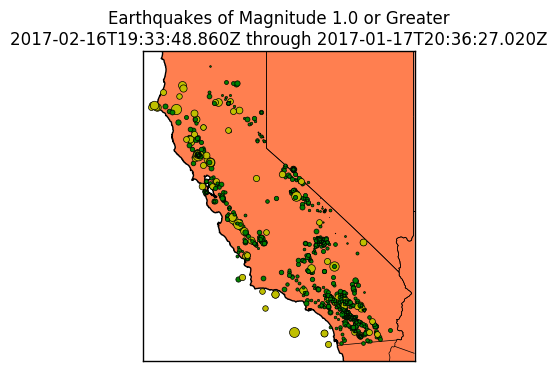

In [23]:
"""California"""
map_mag(ca, -125, 32, -114, 42)

Comparing earthquakes of magnitude maps for California and Alaska, 

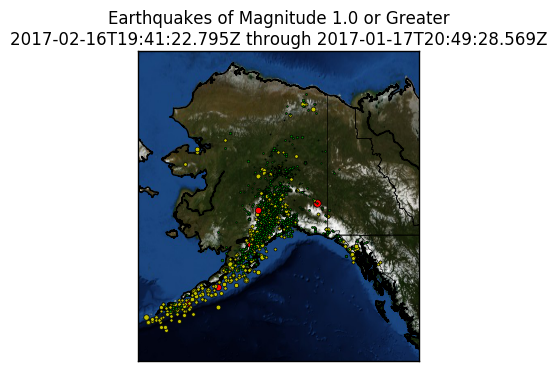

In [17]:
map_mag_earth(ak, -172, 48, -126, 72) #alaska


Above is a landscape map for Alaska and the dots shows the magnitude of each earthquake, we can see that the dots are mostly on the write areas on the map where the white areas are where the mountains are. Thus, we can conclude that mountains in Alaska  has a significance impact on earthquake.

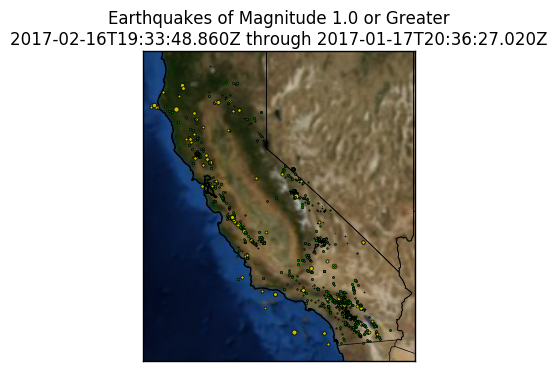

In [18]:
map_mag_earth(ca, -125, 32, -114, 42) #california

Above is a landscape map for California and the dots shows the magnitude of each earthquake, we can see that the dots are mostly fall on the write areas on the map where the white areas are where the mountains are. Thus, we can conclude that mountains in Alaska  has a significance impact on earthquake.